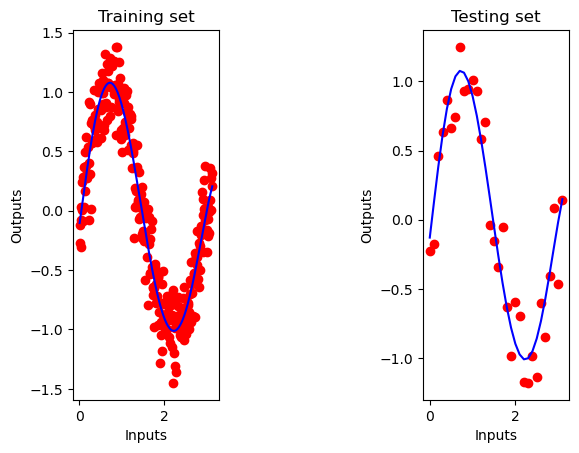

MSE on Training Data:  0.019242105452910694
MSE on Testing Data:  0.022254337914173396
Testing set has more MSE


In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


Trn_Data = pd.read_csv('trainRegression.csv') 
Tst_Data = pd.read_csv('testRegression.csv')


Trn_Inputs  = np.array(Trn_Data['X'])
Trn_Outputs = np.array(Trn_Data['R'])

Tst_Inputs  = np.array(Tst_Data['X'])
Tst_Outputs = np.array(Tst_Data['R'])

A = np.zeros((7,7))
A[0,0] = Trn_Inputs.shape[0]
A[0,1] = np.sum(Trn_Inputs)
A[0,2] = np.sum(Trn_Inputs**2)
A[0,3] = np.sum(Trn_Inputs**3)
A[0,4] = np.sum(Trn_Inputs**4)
A[0,5] = np.sum(Trn_Inputs**5)
A[0,6] = np.sum(Trn_Inputs**6)
A[1,0] = A[0,1]
A[1,1] = A[0,2]
A[1,2] = A[0,3]
A[1,3] = A[0,4]
A[1,4] = A[0,5]
A[1,5] = A[0,6]
A[1,6] = np.sum(Trn_Inputs**7)
A[2,0] = A[0,2]
A[2,1] = A[0,3]
A[2,2] = A[0,4]
A[2,3] = A[0,5]
A[2,4] = A[0,6]
A[2,5] = A[1,6]
A[2,6] = np.sum(Trn_Inputs**8)
A[3,0] = A[0,3]
A[3,1] = A[0,4]
A[3,2] = A[0,5]
A[3,3] = A[0,6]
A[3,4] = A[1,6]
A[3,5] = A[2,6]
A[3,6] = np.sum(Trn_Inputs**9)
A[4,0] = A[0,4]
A[4,1] = A[0,5]
A[4,2] = A[0,6]
A[4,3] = A[1,6]
A[4,4] = A[2,6]
A[4,5] = A[3,6]
A[4,6] = np.sum(Trn_Inputs**10)
A[5,0] = A[0,5]
A[5,1] = A[0,6]
A[5,2] = A[1,6]
A[5,3] = A[2,6]
A[5,4] = A[3,6]
A[5,5] = A[4,6]
A[5,6] = np.sum(Trn_Inputs**11)
A[6,0] = A[0,6]
A[6,1] = A[1,6]
A[6,2] = A[2,6]
A[6,3] = A[3,6]
A[6,4] = A[4,6]
A[6,5] = A[5,6]
A[6,6] = np.sum(Trn_Inputs**12)

B = np.zeros((7,1))
B[0,0] = np.sum(Trn_Outputs)
B[1,0] = np.sum(Trn_Outputs * Trn_Inputs)
B[2,0] = np.sum(Trn_Outputs * Trn_Inputs**2)
B[3,0] = np.sum(Trn_Outputs * Trn_Inputs**3)
B[4,0] = np.sum(Trn_Outputs * Trn_Inputs**4)
B[5,0] = np.sum(Trn_Outputs * Trn_Inputs**5)
B[6,0] = np.sum(Trn_Outputs * Trn_Inputs**6)


A_inv = np.linalg.inv(A) 
Thetas = np.zeros((7,1))
Thetas = A_inv.dot(B)


Predictions_On_Trn_Data = Thetas[0,0] + (Thetas[1,0] * Trn_Inputs) + (Thetas[2,0] * Trn_Inputs**2) + (Thetas[3,0] * Trn_Inputs**3) + (Thetas[4,0] * Trn_Inputs**4) + (Thetas[5,0] * Trn_Inputs**5) + (Thetas[6,0] * Trn_Inputs**6)

plt.subplot(1,3,1)
plt.scatter(Trn_Inputs , Trn_Outputs , color='red')
plt.plot(Trn_Inputs , Predictions_On_Trn_Data, color = 'blue')
plt.title('Training set')
plt.xlabel('Inputs')
plt.ylabel('Outputs')

MSE_Trn = np.sum((Predictions_On_Trn_Data - Trn_Outputs)**2) / (2 * Trn_Inputs.shape[0])


Predictions_On_Tst_Data = Thetas[0,0] + (Thetas[1,0] * Tst_Inputs) + (Thetas[2,0] * Tst_Inputs**2) + (Thetas[3,0] * Tst_Inputs**3) +  (Thetas[4,0] * Tst_Inputs**4) +  (Thetas[5,0] * Tst_Inputs**5) +  (Thetas[6,0] * Tst_Inputs**6)

plt.subplot(1,3,3)
plt.scatter(Tst_Inputs , Tst_Outputs , color='red')
plt.plot(Tst_Inputs , Predictions_On_Tst_Data, color = 'blue')
plt.title('Testing set')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.show()

MSE_Tst = np.sum((Predictions_On_Tst_Data - Tst_Outputs)**2) / (2 * Tst_Inputs.shape[0])

print ("MSE on Training Data: " , MSE_Trn)
print ("MSE on Testing Data: " , MSE_Tst)

if MSE_Trn == MSE_Tst:
    print ('Both data sets has same MSE')
elif MSE_Trn > MSE_Tst:
    print ('Training set has more MSE')
else:
    print ('Testing set has more MSE')